In [1]:
# Load module
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
import seaborn as sns

In [2]:
dataset_path = '/content/drive/MyDrive/8101 Customer Analytics/HDI_Segment_v2.csv'
df = pd.read_csv(dataset_path)

In [3]:
dataset_path22 = '/content/drive/MyDrive/8101 Customer Analytics/HDI_Segment22_v2.csv'
df22 = pd.read_csv(dataset_path22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48888 entries, 0 to 48887
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ent                           48888 non-null  object 
 1   Total_Quantity                48888 non-null  int64  
 2   Avg_Quantity_per_Purchase     48888 non-null  float64
 3   Unique_Items                  48888 non-null  int64  
 4   Purchase_Frequency            48888 non-null  int64  
 5   Most_Purchased_Category       48888 non-null  object 
 6   Recency_Last_Purchase         48888 non-null  int64  
 7   Avg_Spend_per_Transaction     48888 non-null  float64
 8   %_Total_Qty_offline           48888 non-null  float64
 9   %_Total_Qty_online            48888 non-null  float64
 10  %_unique_items_offline        48888 non-null  float64
 11  %_unique_items_online         48888 non-null  float64
 12  %_purchase_frequency_offline  48888 non-null  float64
 13  %

In [5]:
#Seperate numerical and categorical variables
numerical_vars = df.select_dtypes(exclude=['object']).iloc[:,2:] #exclude customerid and churn
categorical_vars = df.select_dtypes(include=['object'])

In [6]:
desc = df.groupby('Clusters').describe()
print("Summary statistics of numerical variables by Clusters:")
for col in numerical_vars.columns[:-1]:
    display(HTML(f"{col.upper()}"))
    display(desc[col].style.bar(color='lavender'))
    display(HTML(''))

Summary statistics of numerical variables by Clusters:


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,4.439873,3.110250,1.000000,2.000000,4.000000,6.000000,22.000000
1,19944.000000,5.671029,3.677577,1.000000,3.000000,5.000000,8.000000,24.000000
2,70.000000,17.842857,4.968410,3.000000,15.000000,18.000000,20.000000,30.000000
3,9091.000000,14.671983,4.931498,2.000000,11.000000,14.000000,17.000000,47.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,3.331547,3.054706,1.000000,1.000000,2.000000,4.000000,27.000000
1,19944.000000,4.163458,3.210503,1.000000,2.000000,3.000000,6.000000,21.000000
2,70.000000,28.257143,37.764597,2.000000,10.000000,15.000000,23.500000,160.000000
3,9091.000000,13.488285,6.563019,1.000000,9.000000,12.000000,16.000000,146.000000


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in double_scalars
  end = (x - left) / (right - left)


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,47.991710,40.494380,0.000000,13.000000,34.000000,81.000000,173.000000
1,19944.000000,31.601133,33.098888,0.000000,7.000000,24.000000,38.000000,173.000000
2,70.000000,12.428571,9.142307,0.000000,4.000000,12.500000,21.000000,30.000000
3,9091.000000,11.928941,10.657133,0.000000,3.000000,11.000000,19.000000,135.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,2.760072,1.894296,1.000000,1.600000,2.142857,3.500000,63.125000
1,19944.000000,2.461768,1.510081,1.000000,1.500000,2.000000,3.000000,51.000000
2,70.000000,83.618902,135.166517,1.500000,2.900000,5.603896,123.720588,728.000000
3,9091.000000,2.903616,2.372596,1.000000,2.040833,2.500000,3.200000,89.937500


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.000005,0.000006,0.000001,0.000002,0.000004,0.000007,0.000355
1,19944.000000,0.000001,0.000002,0.000000,0.000000,0.000001,0.000002,0.000166
2,70.000000,0.001889,0.003210,0.000001,0.000016,0.000037,0.002258,0.016829
3,9091.000000,0.000016,0.000039,0.000000,0.000006,0.000011,0.000018,0.001105


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.000001,0.000002,0.000000,0.000000,0.000000,0.000001,0.000022
1,19944.000000,0.000009,0.000007,0.000001,0.000003,0.000006,0.000012,0.000077
2,70.000000,0.000010,0.000010,0.000000,0.000003,0.000007,0.000015,0.000056
3,9091.000000,0.000018,0.000015,0.000000,0.000007,0.000015,0.000026,0.000262


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.932974,0.129299,0.250000,0.916667,1.000000,1.000000,1.000000
1,19944.000000,0.218726,0.222245,0.000000,0.000000,0.181818,0.400000,1.000000
2,70.000000,0.751429,0.191922,0.187500,0.637987,0.777778,0.889803,1.000000
3,9091.000000,0.563935,0.260708,0.000000,0.363636,0.583333,0.769231,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.087642,0.161811,0.000000,0.000000,0.000000,0.142857,1.000000
1,19944.000000,0.823924,0.199300,0.181818,0.666667,0.888889,1.000000,1.000000
2,70.000000,0.307035,0.220181,0.000000,0.143939,0.270979,0.450284,0.937500
3,9091.000000,0.555384,0.284811,0.000000,0.333333,0.588235,0.800000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.927327,0.136735,0.333333,0.909091,1.000000,1.000000,1.000000
1,19944.000000,0.253349,0.249851,0.000000,0.000000,0.250000,0.500000,1.000000
2,70.000000,0.784164,0.202008,0.250000,0.666667,0.825758,0.975078,1.000000
3,9091.000000,0.576822,0.249215,0.000000,0.400000,0.588235,0.769231,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.085066,0.152453,0.000000,0.000000,0.000000,0.142857,1.000000
1,19944.000000,0.785357,0.221417,0.200000,0.571429,0.833333,1.000000,1.000000
2,70.000000,0.249422,0.212938,0.000000,0.066845,0.218254,0.372159,0.800000
3,9091.000000,0.461749,0.255253,0.000000,0.272727,0.454545,0.666667,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,1.262599,2.782432,0.000000,0.000000,0.000000,1.000000,26.000000
1,19944.000000,0.715955,1.238817,0.000000,0.000000,1.000000,1.000000,20.000000
2,70.000000,10.657143,7.999793,0.000000,2.000000,10.000000,18.000000,26.000000
3,9091.000000,3.267957,4.770523,0.000000,1.000000,1.000000,3.000000,27.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.020725,0.142465,0.000000,0.000000,0.000000,0.000000,1.000000
1,19944.000000,0.013939,0.117241,0.000000,0.000000,0.000000,0.000000,1.000000
2,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9091.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.117677,0.322233,0.000000,0.000000,0.000000,0.000000,1.000000
1,19944.000000,0.119134,0.323954,0.000000,0.000000,0.000000,0.000000,1.000000
2,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9091.000000,0.002200,0.046855,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.093868,0.291653,0.000000,0.000000,0.000000,0.000000,1.000000
1,19944.000000,0.161352,0.367864,0.000000,0.000000,0.000000,0.000000,1.000000
2,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9091.000000,0.017820,0.132303,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.004094,0.063858,0.000000,0.000000,0.000000,0.000000,1.000000
1,19944.000000,0.009025,0.094574,0.000000,0.000000,0.000000,0.000000,1.000000
2,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9091.000000,0.003190,0.056393,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.708588,0.454424,0.000000,0.000000,1.000000,1.000000,1.000000
1,19944.000000,0.658444,0.474243,0.000000,0.000000,1.000000,1.000000,1.000000
2,70.000000,0.028571,0.167802,0.000000,0.000000,0.000000,0.000000,1.000000
3,9091.000000,0.343087,0.474766,0.000000,0.000000,0.000000,1.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.005611,0.074697,0.000000,0.000000,0.000000,0.000000,1.000000
1,19944.000000,0.005816,0.076044,0.000000,0.000000,0.000000,0.000000,1.000000
2,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9091.000000,0.054229,0.226482,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.000960,0.030977,0.000000,0.000000,0.000000,0.000000,1.000000
1,19944.000000,0.000251,0.015832,0.000000,0.000000,0.000000,0.000000,1.000000
2,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9091.000000,0.003850,0.061932,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.045595,0.208610,0.000000,0.000000,0.000000,0.000000,1.000000
1,19944.000000,0.030586,0.172197,0.000000,0.000000,0.000000,0.000000,1.000000
2,70.000000,0.042857,0.203997,0.000000,0.000000,0.000000,0.000000,1.000000
3,9091.000000,0.406666,0.491239,0.000000,0.000000,0.000000,1.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.002831,0.053130,0.000000,0.000000,0.000000,0.000000,1.000000
1,19944.000000,0.001304,0.036083,0.000000,0.000000,0.000000,0.000000,1.000000
2,70.000000,0.057143,0.233791,0.000000,0.000000,0.000000,0.000000,1.000000
3,9091.000000,0.119459,0.324345,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.000051,0.007110,0.000000,0.000000,0.000000,0.000000,1.000000
1,19944.000000,0.000150,0.012264,0.000000,0.000000,0.000000,0.000000,1.000000
2,70.000000,0.042857,0.203997,0.000000,0.000000,0.000000,0.000000,1.000000
3,9091.000000,0.036300,0.187045,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,19944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,70.000000,0.614286,0.490278,0.000000,0.000000,1.000000,1.000000,1.000000
3,9091.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,19944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,70.000000,0.100000,0.302166,0.000000,0.000000,0.000000,0.000000,1.000000
3,9091.000000,0.008360,0.091055,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,19944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,70.000000,0.071429,0.259399,0.000000,0.000000,0.000000,0.000000,1.000000
3,9091.000000,0.003740,0.061044,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,19944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9091.000000,0.000110,0.010488,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,19944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,70.000000,0.042857,0.203997,0.000000,0.000000,0.000000,0.000000,1.000000
3,9091.000000,0.000990,0.031450,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,3.999899,4.718611,1.000000,2.000000,3.000000,4.000000,69.000000
1,19944.000000,3.773566,4.295644,1.000000,1.000000,3.000000,4.000000,64.000000
2,70.000000,52.000000,41.739357,6.000000,22.750000,43.500000,66.500000,294.000000
3,9091.000000,18.405016,19.861613,1.000000,6.000000,13.000000,24.000000,439.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,3456180.559066,3123007.289174,0.000000,1615000.000000,1983000.000000,4772500.000000,29657000.000000
1,19944.000000,4177173.937024,3130734.510674,42000.000000,1656000.000000,3178000.000000,6008250.000000,23548000.000000
2,70.000000,21832055.714286,12647476.420112,1595000.000000,12838000.000000,19241250.000000,25888625.000000,78005000.000000
3,9091.000000,13836763.921461,5662727.796898,1395000.000000,9910000.000000,11998000.000000,17167750.000000,67889500.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,1014327.222236,644678.767775,0.000000,614260.416667,902500.000000,1432104.166667,21060000.000000
1,19944.000000,1043924.626707,567660.235467,40000.000000,645645.833333,904633.333333,1430395.833333,14405000.000000
2,70.000000,1118974.623124,566622.603424,82379.139073,792071.428571,1044682.692308,1377975.000000,3198500.000000
3,9091.000000,1000218.394511,458385.097162,52350.171233,688901.785714,912913.461538,1205752.884615,6459000.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.913575,0.162792,0.000000,0.875732,1.000000,1.000000,1.000000
1,19944.000000,0.133450,0.180695,0.000000,0.000000,0.028361,0.242583,0.822602
2,70.000000,0.701629,0.229605,0.031348,0.570457,0.713057,0.886915,1.000000
3,9091.000000,0.507544,0.264871,0.000000,0.311769,0.511813,0.702265,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,0.084049,0.156622,0.000000,0.000000,0.000000,0.119032,0.896552
1,19944.000000,0.866550,0.180695,0.177398,0.757417,0.971639,1.000000,1.000000
2,70.000000,0.298371,0.229605,0.000000,0.113085,0.286943,0.429543,0.968652
3,9091.000000,0.492456,0.264871,0.000000,0.297735,0.488187,0.688231,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,19783.000000,5589269.347420,14657882.937947,0.000000,0.000000,0.000000,5387500.000000,294840000.000000
1,19944.000000,3756340.277778,6778922.095855,0.000000,0.000000,465000.000000,5809250.000000,151400000.000000
2,70.000000,273499251.428571,302282520.146211,0.000000,42847350.000000,196558000.000000,397826625.000000,1482095000.000000
3,9091.000000,45951916.097239,74870415.613423,0.000000,10303750.000000,17549500.000000,42121500.000000,790470000.000000


<ipython-input-7-4bf5c71df881>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='Clusters', palette=palette, ax=ax)


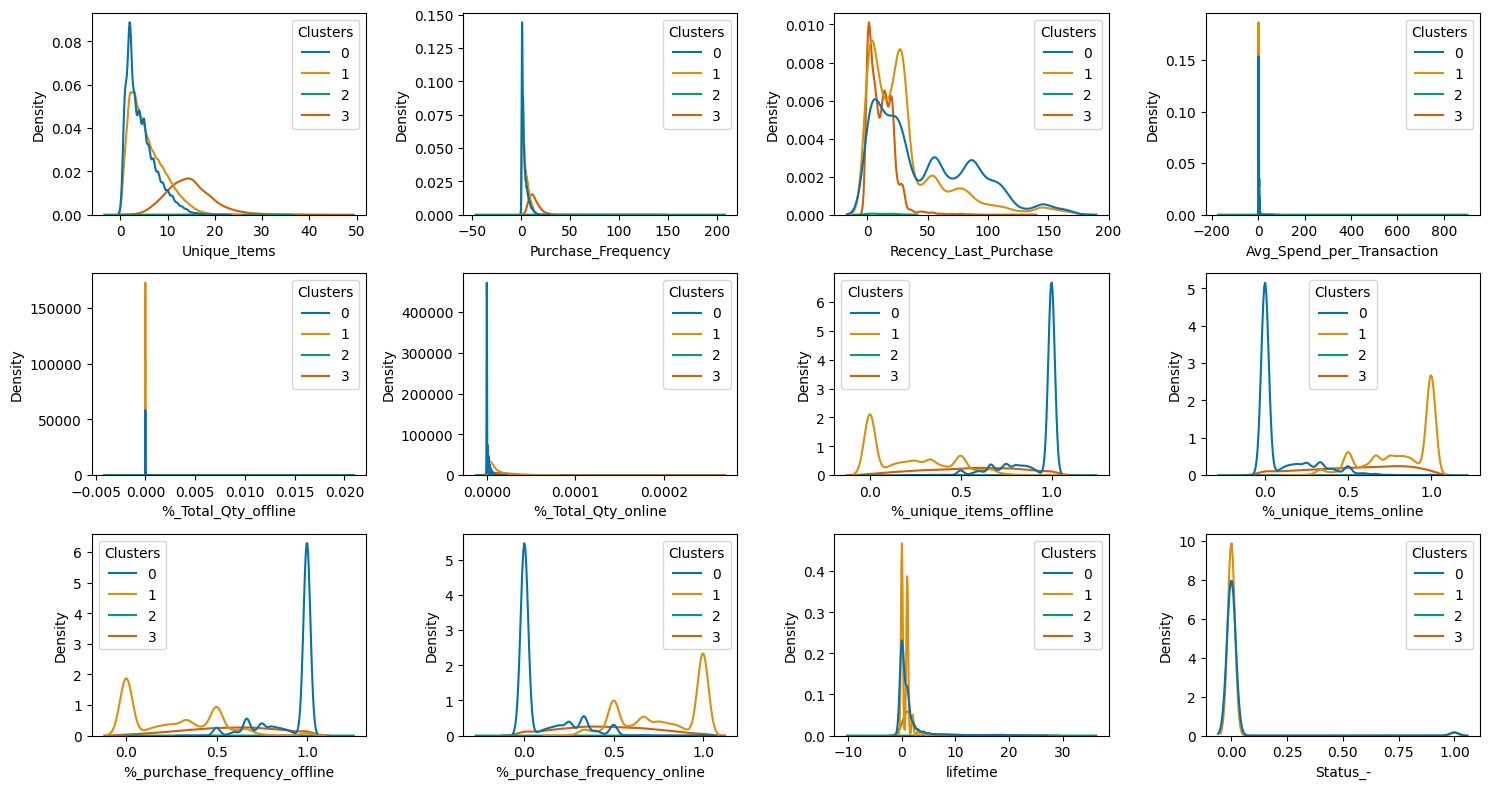

In [7]:
palette = 'colorblind'
fig, axes = plt.subplots(3,4, figsize=(15,8), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(numerical_vars, axes):
    sns.kdeplot(data=df, x=col, hue='Clusters', palette=palette, ax=ax)
plt.show()

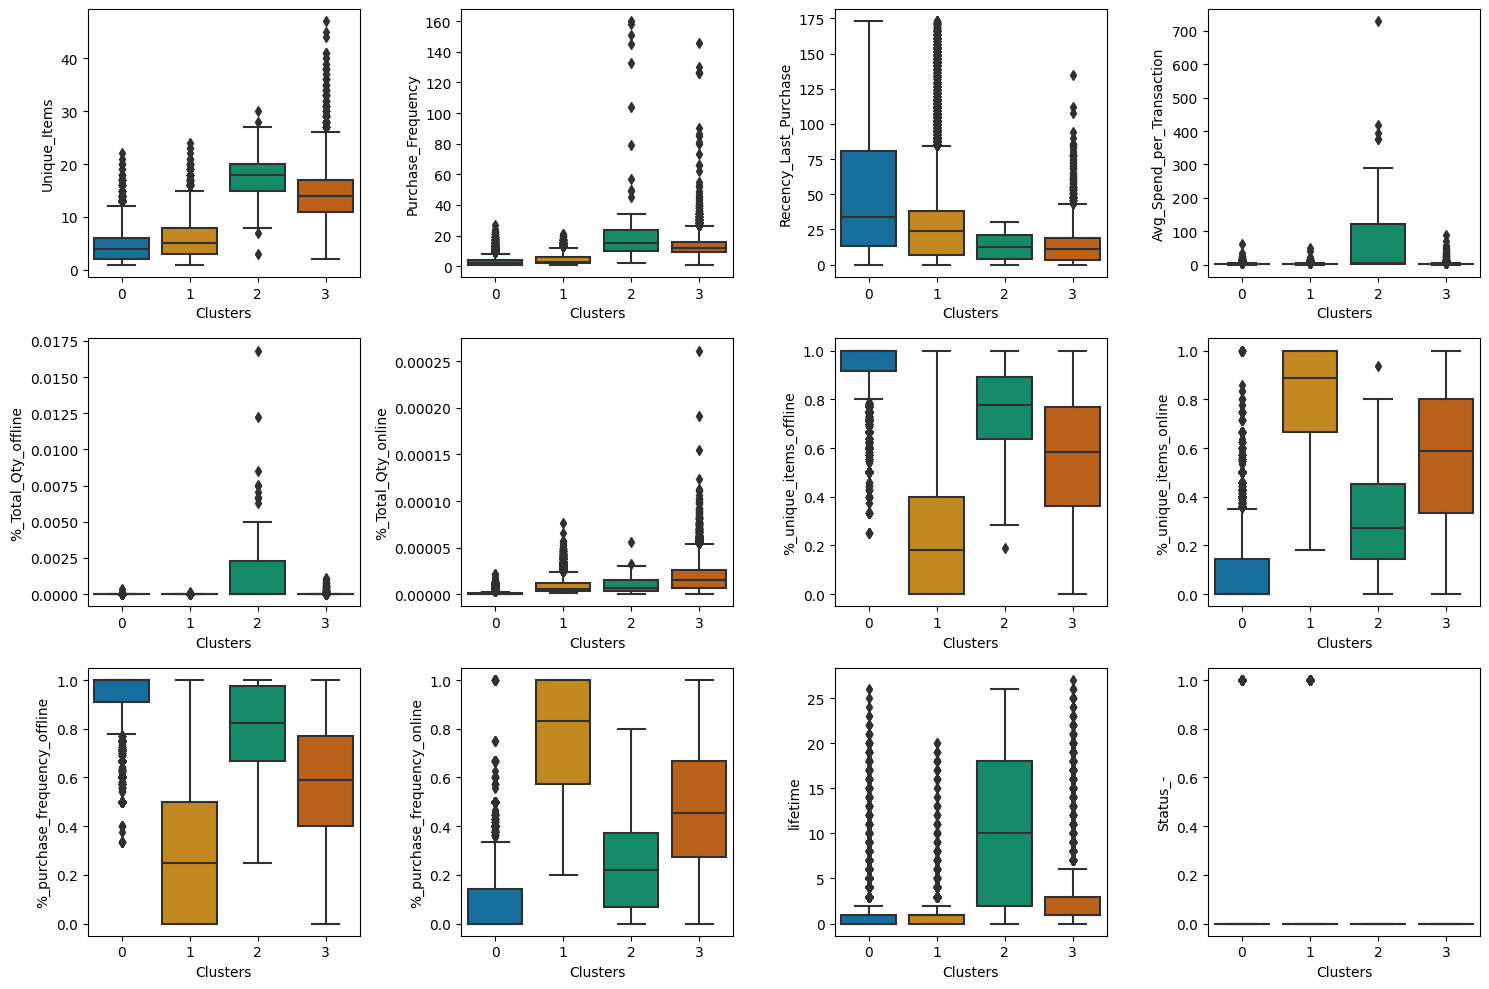

In [8]:
fig, axes = plt.subplots(3,4, figsize=(15,10), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(numerical_vars, axes):
    sns.boxplot(data=df, y=col, x='Clusters', palette=palette, ax=ax)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48888 entries, 0 to 48887
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ent                           48888 non-null  object 
 1   Total_Quantity                48888 non-null  int64  
 2   Avg_Quantity_per_Purchase     48888 non-null  float64
 3   Unique_Items                  48888 non-null  int64  
 4   Purchase_Frequency            48888 non-null  int64  
 5   Most_Purchased_Category       48888 non-null  object 
 6   Recency_Last_Purchase         48888 non-null  int64  
 7   Avg_Spend_per_Transaction     48888 non-null  float64
 8   %_Total_Qty_offline           48888 non-null  float64
 9   %_Total_Qty_online            48888 non-null  float64
 10  %_unique_items_offline        48888 non-null  float64
 11  %_unique_items_online         48888 non-null  float64
 12  %_purchase_frequency_offline  48888 non-null  float64
 13  %

In [10]:
# Include only top feature importance
fimp = ['Total_Amount','%_Total_Amount_online','%_Total_Amount_offline',
        'Unique_Items','%_unique_items_online','%_unique_items_offline',
        'Purchase_Frequency','%_purchase_frequency_online','%_purchase_frequency_offline',
        'Total_Quantity','%_Total_Qty_online','%_Total_Qty_offline',
        'CLV','no_downline']

# Group by cluster and calculate the average of top10 fimp
cluster_averages = df.groupby('Clusters')[fimp].mean()
cluster_averages = cluster_averages.round(decimals=4)

# Display the average values per cluster
cluster_averages

,Total_Amount,%_Total_Amount_online,%_Total_Amount_offline,Unique_Items,%_unique_items_online,%_unique_items_offline,Purchase_Frequency,%_purchase_frequency_online,%_purchase_frequency_offline,Total_Quantity,%_Total_Qty_online,%_Total_Qty_offline,CLV,no_downline
Clusters,,,,,,,,,,,,,,
0,3.456181e+06,0.0840,0.9136,4.4399,0.0876,0.9330,3.3315,0.0851,0.9273,8.3196,0.0,0.0000,5.589269e+06,3.9999
1,4.177174e+06,0.8665,0.1335,5.6710,0.8239,0.2187,4.1635,0.7854,0.2533,9.5300,0.0,0.0000,3.756340e+06,3.7736
2,2.183206e+07,0.2984,0.7016,17.8429,0.3070,0.7514,28.2571,0.2494,0.7842,2687.4571,0.0,0.0019,2.734993e+08,52.0000
3,1.383676e+07,0.4925,0.5075,14.6720,0.5554,0.5639,13.4883,0.4617,0.5768,38.4135,0.0,0.0000,4.595192e+07,18.4050


In [11]:
# Group by cluster and calculate the average of top10 fimp
cluster_averages22 = df22.groupby('Clusters_22')[fimp].mean()
cluster_averages22 = cluster_averages22.round(decimals=4)

# Display the average values per cluster
cluster_averages22

,Total_Amount,%_Total_Amount_online,%_Total_Amount_offline,Unique_Items,%_unique_items_online,%_unique_items_offline,Purchase_Frequency,%_purchase_frequency_online,%_purchase_frequency_offline,Total_Quantity,%_Total_Qty_online,%_Total_Qty_offline,CLV,no_downline
Clusters_22,,,,,,,,,,,,,,
0,6.811551e+06,0.1429,0.8564,8.7536,0.1784,0.8586,6.3500,0.1665,0.8500,20.2033,0.0,0.0000,2.045786e+07,6.4036
1,5.442217e+06,0.9153,0.0847,8.1009,0.9038,0.1262,5.8792,0.8861,0.1447,17.1951,0.0,0.0000,1.062827e+07,4.2441
2,3.474816e+07,0.3985,0.6015,33.9615,0.4762,0.6168,44.8846,0.3987,0.6255,1569.2115,0.0,0.0013,3.778718e+08,53.8462
3,1.988435e+07,0.6093,0.3903,22.0022,0.6584,0.4459,20.3326,0.5965,0.4340,70.4619,0.0,0.0000,9.799170e+07,19.3028
